In [219]:
import pandas as pd #...................................................to load and manipulate data
import numpy as np #....................................................to calculation
import seaborn as sns #.................................................to plot the heatmap

from matplotlib import pyplot as plt #..................................to plot graphs
from sklearn import neighbors #.........................................to find the nearest neighbour
from sklearn.model_selection import train_test_split #..................to split the data into training and testing sets
from sklearn.metrics import accuracy_score #............................to check the accuracy score
from sklearn import preprocessing #.....................................
from sklearn.tree import DecisionTreeClassifier #.......................to buid a classification tree
from sklearn.preprocessing import MinMaxScaler #........................
from ipywidgets import interactive #....................................to create interactive charts
from sklearn.metrics import normalized_mutual_info_score #..............to calculate normalised mutual information
from sklearn.metrics import mean_squared_error, r2_score#..............to calculate linear regression model
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency
import scipy.stats as stats 
%matplotlib inline

Data_w = pd.read_csv("weather_data.csv")
Data_p = pd.read_csv("price_demand_data.csv")

Data_w


,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,6,N,2,1018.8,28.1,43,5,E,13,1015.3
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,7,NW,17,1013.3,28.7,38,7,SW,4,1008.5
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,8,SW,4,1007.7,23.5,59,4,SW,2,1005.2
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,8,SE,11,1010.0,18.2,82,8,SW,17,1011.0
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,8,SE,13,1012.5,18.2,82,8,SE,19,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,24/08/2021,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,7,SE,17,1021.5,11.7,55,6,S,17,1021.6
214,25/08/2021,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,3,SE,15,1023.3,13.4,59,6,SW,17,1021.8
215,28/08/2021,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,1,N,7,1018.6,17.4,31,3,NW,24,1013.5
216,29/08/2021,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,7,N,13,1011.4,12.8,84,7,S,6,1010.4


In [33]:
 #check the data types 
Data_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               218 non-null    object 
 1   Minimum temperature (°C)           218 non-null    float64
 2   Maximum temperature (°C)           218 non-null    float64
 3   Rainfall (mm)                      218 non-null    float64
 4   Evaporation (mm)                   218 non-null    float64
 5   Sunshine (hours)                   218 non-null    float64
 6   Direction of maximum wind gust     218 non-null    object 
 7   Speed of maximum wind gust (km/h)  218 non-null    int64  
 8   Time of maximum wind gust          218 non-null    object 
 9   9am Temperature (°C)               218 non-null    float64
 10  9am relative humidity (%)          218 non-null    int64  
 11  9am cloud amount (oktas)           218 non-null    int64  

In [34]:
# the date type has been changed to date time format, assign to original 
Data_w["Date"] = Data_w["Date"] = pd.to_datetime(Data_w["Date"])
Data_w["Date"]

0     2021-01-01
1     2021-02-01
2     2021-03-01
3     2021-04-01
4     2021-05-01
         ...    
213   2021-08-24
214   2021-08-25
215   2021-08-28
216   2021-08-29
217   2021-08-30
Name: Date, Length: 218, dtype: datetime64[ns]

In [35]:
#Seprating Dates & Time in diffrent coloumn


Data_p['Date'] = pd. to_datetime(Data_p['SETTLEMENTDATE']). dt. date
Data_p['Time'] = pd. to_datetime(Data_p['SETTLEMENTDATE']). dt. time

display(Data_p.head(10))

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,Time
0,VIC1,1/01/2021 0:30,4179.21,LOW,2021-01-01,00:30:00
1,VIC1,1/01/2021 1:00,4047.76,LOW,2021-01-01,01:00:00
2,VIC1,1/01/2021 1:30,3934.70,LOW,2021-01-01,01:30:00
3,VIC1,1/01/2021 2:00,3766.45,LOW,2021-01-01,02:00:00
4,VIC1,1/01/2021 2:30,3590.37,LOW,2021-01-01,02:30:00
5,VIC1,1/01/2021 3:00,3549.37,LOW,2021-01-01,03:00:00
6,VIC1,1/01/2021 3:30,3504.17,LOW,2021-01-01,03:30:00
7,VIC1,1/01/2021 4:00,3547.90,LOW,2021-01-01,04:00:00
8,VIC1,1/01/2021 4:30,3579.11,LOW,2021-01-01,04:30:00
9,VIC1,1/01/2021 5:00,3580.77,LOW,2021-01-01,05:00:00


In [24]:
# Check the data type in all the columns
Data_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11664 entries, 0 to 11663
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REGION          11664 non-null  object 
 1   SETTLEMENTDATE  11664 non-null  object 
 2   TOTALDEMAND     11664 non-null  float64
 3   PRICECATEGORY   11664 non-null  object 
 4   Date            11664 non-null  object 
 5   Time            11664 non-null  object 
dtypes: float64(1), object(5)
memory usage: 546.9+ KB


In [36]:
# We need to extract the dates from date_time data from the settlement date column, for that we convert the column type to datetime format instead of object type
Data_p["Date"] = pd.to_datetime(Data_p["Date"])
Data_p["Date"].head()

0   2021-01-01
1   2021-01-01
2   2021-01-01
3   2021-01-01
4   2021-01-01
Name: Date, dtype: datetime64[ns]

In [37]:
# assign to original
Data_p["Date"]=Data_p["Date"]= pd.to_datetime(Data_p["Date"])
Data_p["Date"]

0       2021-01-01
1       2021-01-01
2       2021-01-01
3       2021-01-01
4       2021-01-01
           ...    
11659   2021-08-31
11660   2021-08-31
11661   2021-08-31
11662   2021-08-31
11663   2021-01-09
Name: Date, Length: 11664, dtype: datetime64[ns]

In [38]:
#Now make them as groups and find the median value_DataMining
Data_pg = Data_p.groupby("Date").max("TOTALDEMAND")
Data_pg

,TOTALDEMAND
Date,
2021-01-01,5019.64
2021-01-02,5228.29
2021-01-03,5225.37
2021-01-04,5807.02
2021-01-05,5261.09
...,...
2021-12-04,6415.58
2021-12-05,6406.00
2021-12-06,6062.58


In [39]:
Data_p["TOTALDEMAND"].describe()

count    11664.000000
mean      4925.798454
std        876.407490
min       2708.530000
25%       4255.500000
50%       4803.755000
75%       5477.337500
max       8196.830000
Name: TOTALDEMAND, dtype: float64

In [40]:
#The merged dataframe is assigned as MergeData
MergeData = Data_w.merge(Data_pg, how = 'inner', on = 'Date') 
MergeData

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),TOTALDEMAND
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,N,2,1018.8,28.1,43,5,E,13,1015.3,5019.64
1,2021-02-01,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,NW,17,1013.3,28.7,38,7,SW,4,1008.5,4964.35
2,2021-03-01,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,SW,4,1007.7,23.5,59,4,SW,2,1005.2,4503.31
3,2021-04-01,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,SE,11,1010.0,18.2,82,8,SW,17,1011.0,4764.18
4,2021-05-01,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,SE,13,1012.5,18.2,82,8,SE,19,1013.3,4800.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-08-24,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,SE,17,1021.5,11.7,55,6,S,17,1021.6,6717.65
214,2021-08-25,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,SE,15,1023.3,13.4,59,6,SW,17,1021.8,6736.80
215,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,N,7,1018.6,17.4,31,3,NW,24,1013.5,5716.32
216,2021-08-29,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,N,13,1011.4,12.8,84,7,S,6,1010.4,6227.89


In [18]:
# Average daily temperature

temp = MergeData.loc[:, "Minimum temperature (°C)":"Maximum temperature (°C)"]
MergeData['Average_temp_/day(°C)'] = temp.mean(axis = 1)
MergeData

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),TOTALDEMAND,Average_temp_/day(°C)
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,2,1018.8,28.1,43,5,E,13,1015.3,5019.64,22.75
1,2021-02-01,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,17,1013.3,28.7,38,7,SW,4,1008.5,4964.35,23.70
2,2021-03-01,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,4,1007.7,23.5,59,4,SW,2,1005.2,4503.31,21.60
3,2021-04-01,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,11,1010.0,18.2,82,8,SW,17,1011.0,4764.18,17.30
4,2021-05-01,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,13,1012.5,18.2,82,8,SE,19,1013.3,4800.64,17.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-08-24,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,17,1021.5,11.7,55,6,S,17,1021.6,6717.65,9.75
214,2021-08-25,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,15,1023.3,13.4,59,6,SW,17,1021.8,6736.80,11.05
215,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,7,1018.6,17.4,31,3,NW,24,1013.5,5716.32,11.55
216,2021-08-29,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,13,1011.4,12.8,84,7,S,6,1010.4,6227.89,12.65


In [41]:
# Renaming TOTALDEMAND to MAXDEMAND
MergeData.rename(columns = {'TOTALDEMAND':'MAXDEMAND'}, inplace = True)
display(MergeData.head())

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),MAXDEMAND
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,N,2,1018.8,28.1,43,5,E,13,1015.3,5019.64
1,2021-02-01,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,NW,17,1013.3,28.7,38,7,SW,4,1008.5,4964.35
2,2021-03-01,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,SW,4,1007.7,23.5,59,4,SW,2,1005.2,4503.31
3,2021-04-01,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,SE,11,1010.0,18.2,82,8,SW,17,1011.0,4764.18
4,2021-05-01,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,SE,13,1012.5,18.2,82,8,SE,19,1013.3,4800.64


In [44]:
col = MergeData.loc[:, "Minimum temperature (°C)":"Maximum temperature (°C)"]
MergeData['avg_temp'] = col.mean(axis = 1)
MergeData

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),MAXDEMAND,avg_temp
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,2,1018.8,28.1,43,5,E,13,1015.3,5019.64,22.75
1,2021-02-01,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,17,1013.3,28.7,38,7,SW,4,1008.5,4964.35,23.70
2,2021-03-01,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,4,1007.7,23.5,59,4,SW,2,1005.2,4503.31,21.60
3,2021-04-01,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,11,1010.0,18.2,82,8,SW,17,1011.0,4764.18,17.30
4,2021-05-01,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,13,1012.5,18.2,82,8,SE,19,1013.3,4800.64,17.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-08-24,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,17,1021.5,11.7,55,6,S,17,1021.6,6717.65,9.75
214,2021-08-25,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,15,1023.3,13.4,59,6,SW,17,1021.8,6736.80,11.05
215,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,7,1018.6,17.4,31,3,NW,24,1013.5,5716.32,11.55
216,2021-08-29,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,13,1011.4,12.8,84,7,S,6,1010.4,6227.89,12.65


Pearson r is  0.4512538011046842 in summer time
Pearson r is  -0.7205974296273789 in Autumn time
Pearson r is  -0.6945727109976216 in winter time


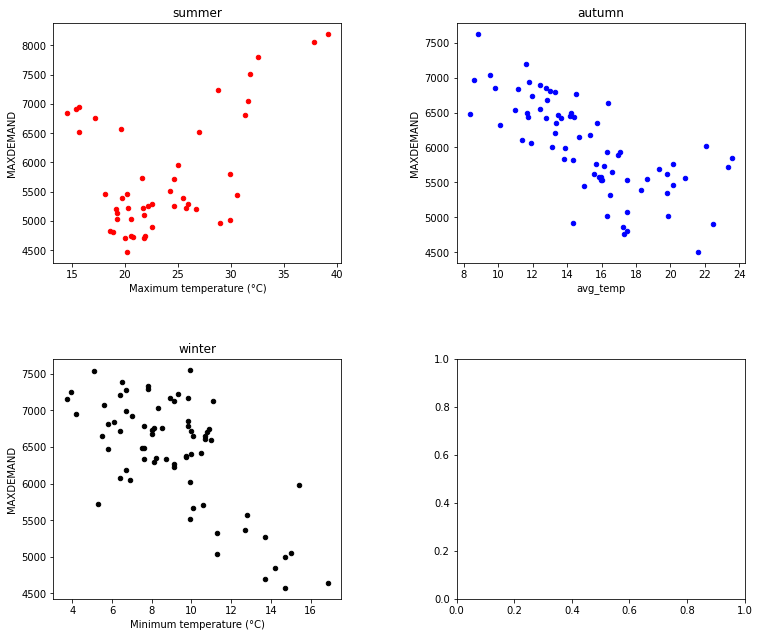

In [45]:
# Compare maxdemand during different session

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

ax1 = axes[0][0]
summer_start = '2020-12-01'
summer_end =  '2021-02-28'
summer = MergeData.loc[(MergeData['Date'] >= summer_start) & (MergeData['Date'] <= summer_end)]
summer.plot.scatter (x = 'Maximum temperature (°C)', y = 'MAXDEMAND', title="summer", ax = ax1, lw = 1, c = 'r')
print("Pearson r is ",summer['Maximum temperature (°C)'].corr(summer['MAXDEMAND']), "in summer time")


ax2 = axes[0][1]
autumn_start = '2021-3-01'
autumn_end = '2021-5-31'
autumn = MergeData.loc[(MergeData['Date'] >= autumn_start) & (MergeData['Date'] <= autumn_end)]
autumn.plot.scatter (x = 'avg_temp', y = 'MAXDEMAND',title="autumn", ax = ax2, lw = 1, c = 'b')
print("Pearson r is ",autumn['avg_temp'].corr(autumn['MAXDEMAND']), "in Autumn time")


ax3 = axes[1][0]
winter_start = '2021-06-01'
winter_end = '2021-08-31'
winter = MergeData.loc[(MergeData['Date'] >= '2021-06-01') & (MergeData['Date'] <= '2021-08-31') ]
winter.plot.scatter (x = 'Minimum temperature (°C)', y = 'MAXDEMAND',title="winter", ax = ax3, lw = 1, c = 'k')
print("Pearson r is ",winter['Minimum temperature (°C)'].corr(winter['MAXDEMAND']), "in winter time")


plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

In [22]:
# get max. energy usage of each day
new_price_df=MergeData.groupby(['Date'])['MAXDEMAND'].max().reset_index()
new_price_df.rename(columns= {'TOTALDEMAND':'MAXDEMAND'}, inplace=True)
new_price_df.info()
display(new_price_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       218 non-null    datetime64[ns]
 1   MAXDEMAND  218 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.5 KB


,Date,MAXDEMAND
0,2021-01-01,5019.64
1,2021-01-02,5228.29
2,2021-01-03,5225.37
3,2021-01-04,5807.02
4,2021-01-05,5261.09
...,...,...
213,2021-12-03,6115.65
214,2021-12-04,6415.58
215,2021-12-06,6062.58
216,2021-12-07,7095.00


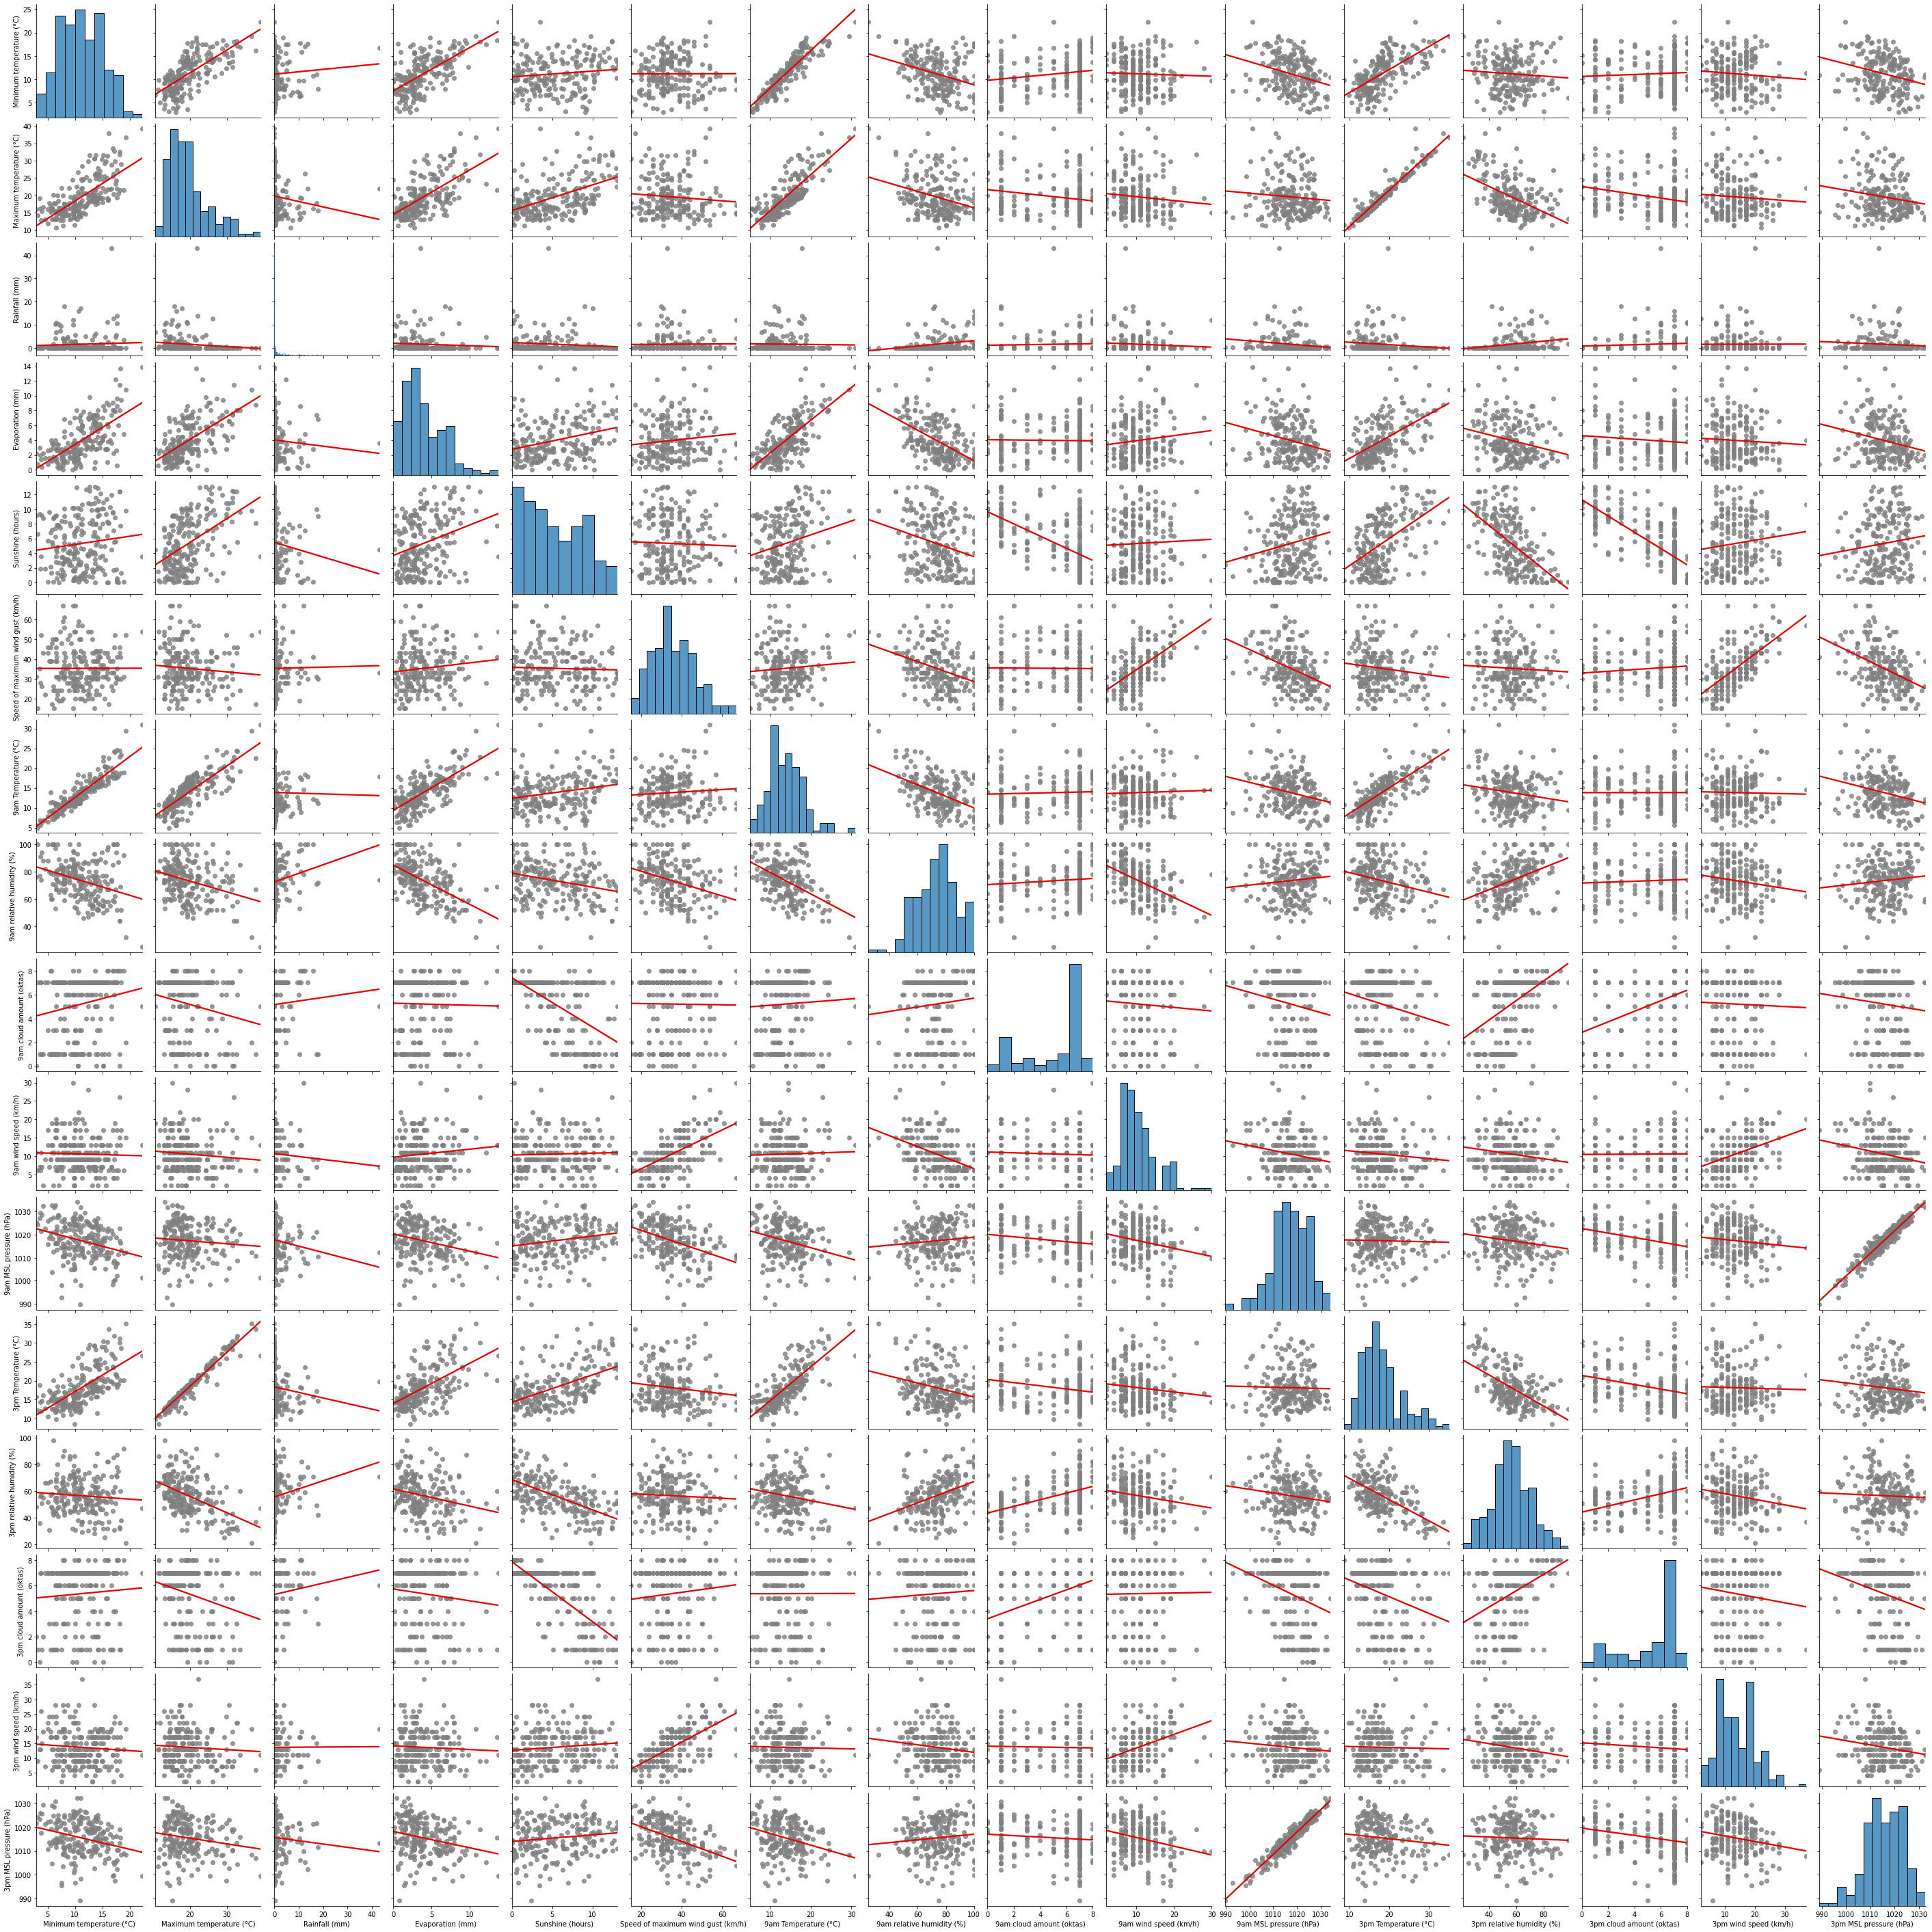

In [23]:
sns.pairplot(Data_w, kind = 'reg', plot_kws = {'ci':None, 'color':'xkcd:red', 'scatter_kws': {'color':'gray'}})

Text(0.5, 1.0, 'Corrilation Map to explain the strength of relationship')

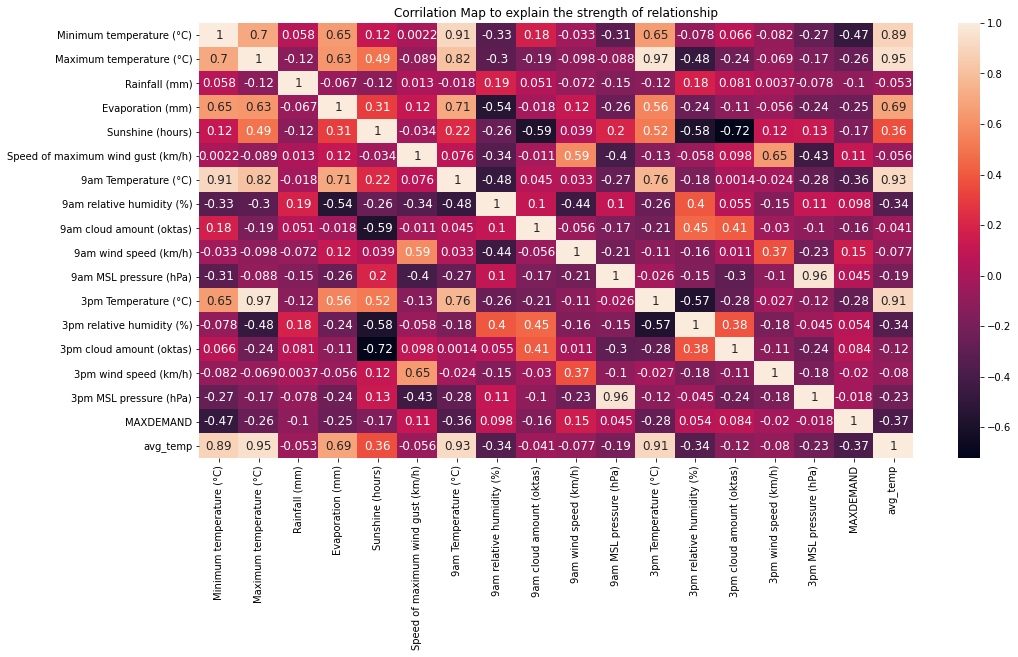

In [46]:
# Corrilarion values- Strong positive corrilations has light colour, negative corrilations has dark colour.
plt.figure(figsize=(16,8))
sns.heatmap(MergeData.corr(), annot = True, annot_kws={"size":12})

plt.title("Corrilation Map to explain the strength of relationship")
#sns.heatmap(MergeData, annot=True, fmt=".lf", linewidth=5, square=True, cmap='Blues_r')


<AxesSubplot:xlabel='Maximum temperature (°C)', ylabel='MAXDEMAND'>

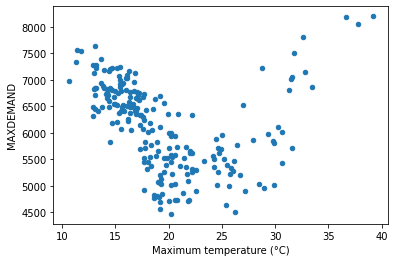

In [26]:
#When the weather is extramly low or exreamly high, then the total demand increases, as people use the energy to maintain the temperature.
MergeData.plot.scatter (x = 'Maximum temperature (°C)',
                        y = 'MAXDEMAND')

In [27]:
myMax = max(max(MergeData['Maximum temperature (°C)']), max(MergeData['MAXDEMAND']))
myMax

8196.83

In [28]:
# get the min

myMin = min(min(MergeData['Maximum temperature (°C)']), max(MergeData['MAXDEMAND']))
myMin

10.6

<AxesSubplot:xlabel='3pm Temperature (°C)', ylabel='MAXDEMAND'>

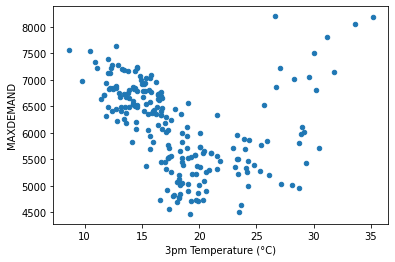

In [29]:
MergeData.plot.scatter (x = '3pm Temperature (°C)',
                        y = 'MAXDEMAND')


In [30]:
myMax = max(max(MergeData['3pm Temperature (°C)']), max(MergeData['MAXDEMAND']))
myMax

8196.83

In [31]:
myMin = min(min(MergeData['3pm Temperature (°C)']), max(MergeData['MAXDEMAND']))
myMin

8.6

In [32]:
# 3 pm is the time that the temperature goes up in summer.Therefore this chart was plotted to give a random idea on energy demand.


In [47]:
col = MergeData.loc[:, "Minimum temperature (°C)":"Maximum temperature (°C)"]
MergeData['avg_temp'] = col.mean(axis = 1)
MergeData

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),MAXDEMAND,avg_temp
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,2,1018.8,28.1,43,5,E,13,1015.3,5019.64,22.75
1,2021-02-01,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,17,1013.3,28.7,38,7,SW,4,1008.5,4964.35,23.70
2,2021-03-01,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,4,1007.7,23.5,59,4,SW,2,1005.2,4503.31,21.60
3,2021-04-01,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,11,1010.0,18.2,82,8,SW,17,1011.0,4764.18,17.30
4,2021-05-01,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,13,1012.5,18.2,82,8,SE,19,1013.3,4800.64,17.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-08-24,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,17,1021.5,11.7,55,6,S,17,1021.6,6717.65,9.75
214,2021-08-25,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,15,1023.3,13.4,59,6,SW,17,1021.8,6736.80,11.05
215,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,7,1018.6,17.4,31,3,NW,24,1013.5,5716.32,11.55
216,2021-08-29,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,13,1011.4,12.8,84,7,S,6,1010.4,6227.89,12.65


<AxesSubplot:xlabel='Minimum temperature (°C)', ylabel='MAXDEMAND'>

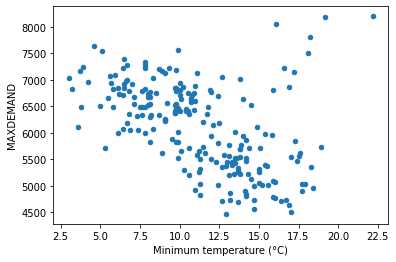

In [34]:
MergeData.plot.scatter (x = 'Minimum temperature (°C)',
                        y = 'MAXDEMAND')

<AxesSubplot:xlabel='Maximum temperature (°C)', ylabel='MAXDEMAND'>

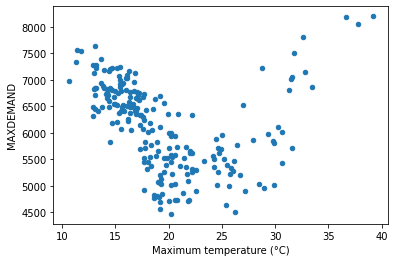

In [35]:
MergeData.plot.scatter (x = 'Maximum temperature (°C)',
                        y = 'MAXDEMAND')

<AxesSubplot:xlabel='avg_temp', ylabel='MAXDEMAND'>

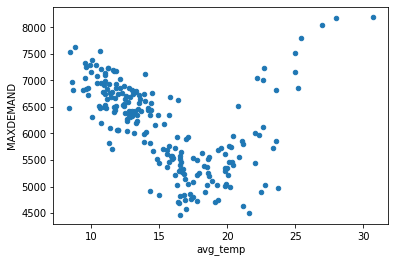

In [48]:
MergeData.plot.scatter (x = 'avg_temp',
                        y = 'MAXDEMAND')

In [49]:
myMax = max(max(MergeData['avg_temp']), max(MergeData['MAXDEMAND']))
myMax

8196.83

In [50]:
myMin = min(min(MergeData['avg_temp']), max(MergeData['MAXDEMAND']))
myMin

8.35

<AxesSubplot:title={'center':' Distribution of Evaporation With Increasing Temperature'}, xlabel='Maximum temperature (°C)', ylabel='Evaporation (mm)'>

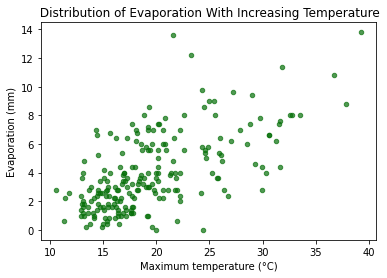

In [39]:
# when the temperature increases, the evaporation increases. So it will gives a linear graph.
MergeData.plot.scatter (x = 'Maximum temperature (°C)',
                        y = 'Evaporation (mm)', title= " Distribution of Evaporation With Increasing Temperature", c = '#07700a', alpha = 0.7)


In [40]:
Linear=['Evaporation (mm)','Maximum temperature (°C)']
MergeData[Linear].corr(method='pearson')

,Evaporation (mm),Maximum temperature (°C)
Evaporation (mm),1.00000,0.62642
Maximum temperature (°C),0.62642,1.00000


In [41]:
#To add an identity line, we try to get the max
myMax = max(max(MergeData['Maximum temperature (°C)']), max(MergeData['Evaporation (mm)']))
myMax

39.2

In [42]:
# get the min

myMin = min(min(MergeData['Evaporation (mm)']), max(MergeData['MAXDEMAND']))
myMin

0.0

<AxesSubplot:title={'center':'Total Demand with Evaporation'}, xlabel='Evaporation (mm)', ylabel='MAXDEMAND'>

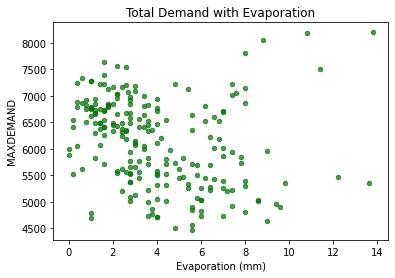

In [43]:
# explain ??????????????????????
MergeData.plot.scatter (x = 'Evaporation (mm)',
                        y = 'MAXDEMAND',  title= "Total Demand with Evaporation",c = '#07700a', alpha = 0.7)

In [44]:
Linear=['Evaporation (mm)','MAXDEMAND']
MergeData[Linear].corr(method='pearson')

,Evaporation (mm),MAXDEMAND
Evaporation (mm),1.000000,-0.245547
MAXDEMAND,-0.245547,1.000000


In [45]:
# get the max

myMax = max(max(MergeData['Evaporation (mm)']), max(MergeData['MAXDEMAND']))
myMax

8196.83

In [46]:
# get the min

myMin = min(min(MergeData['Evaporation (mm)']), max(MergeData['MAXDEMAND']))
myMin

0.0

In [47]:
# Energy consumption may affect by the other factors too

<AxesSubplot:title={'center':'Impact of Sunshine on Temperature'}, xlabel='Sunshine (hours)', ylabel='avg_temp'>

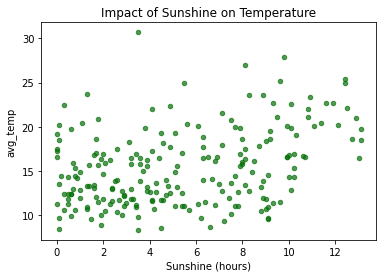

In [51]:
MergeData.plot.scatter (x = 'Sunshine (hours)',
                        y = 'avg_temp', title= "Impact of Sunshine on Temperature",c = '#07700a', alpha = 0.7)

<AxesSubplot:title={'center':'Impact of Sunshine on Max_Demand'}, xlabel='Sunshine (hours)', ylabel='MAXDEMAND'>

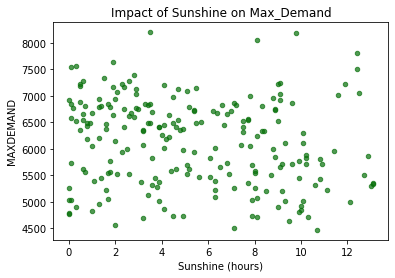

In [49]:
# 1.  sunshne data can be effective on solar energy.When the sunshine increases, the Total demand decreases. negatie linear graph.
MergeData.plot.scatter (x = 'Sunshine (hours)',
                        y = 'MAXDEMAND',  title= "Impact of Sunshine on Max_Demand",c = '#07700a', alpha = 0.7)

In [50]:
# get the max

myMax = max(max(MergeData['Sunshine (hours)']), max(MergeData['MAXDEMAND']))
myMax

8196.83

In [51]:
# get the min

myMin = min(min(MergeData['Sunshine (hours)']), max(MergeData['MAXDEMAND']))
myMin

0.0

<AxesSubplot:title={'center':'Impact of Cloud Amount on Total Demand'}, xlabel='9am cloud amount (oktas)', ylabel='MAXDEMAND'>

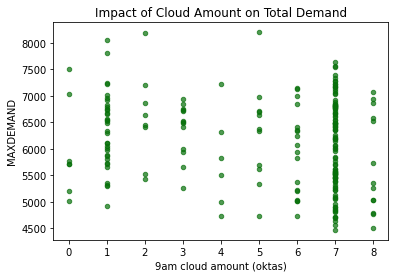

In [52]:
#but the sunshine can be affected by the amount of cloud
MergeData.plot.scatter (x = '9am cloud amount (oktas)',
                        y = 'MAXDEMAND',  title= "Impact of Cloud Amount on Total Demand",c = '#07700a', alpha = 0.7)

<AxesSubplot:title={'center':'How the Cloud Amount Will Impact On Sunshine'}, xlabel='Sunshine (hours)', ylabel='9am cloud amount (oktas)'>

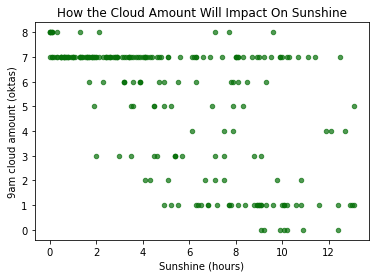

In [53]:
# Less sunshine may due to the cloud amount 
MergeData.plot.scatter (x = 'Sunshine (hours)',
                        y = '9am cloud amount (oktas)',  title= "How the Cloud Amount Will Impact On Sunshine",c = '#07700a', alpha = 0.7)

<AxesSubplot:title={'center':'How the Speed of maximum wind gust Will Impact On Total Demand'}, xlabel='Speed of maximum wind gust (km/h)', ylabel='MAXDEMAND'>

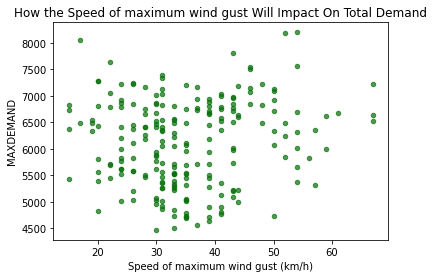

In [54]:
# 2.  Speed of maximum wind gust data can be effective on energy.
MergeData.plot.scatter (x = 'Speed of maximum wind gust (km/h)',
                        y = 'MAXDEMAND',  title= "How the Speed of maximum wind gust Will Impact On Total Demand",c = '#07700a', alpha = 0.7)

<AxesSubplot:title={'center':'Changing Pattern of Relative Humidity with Increasing Temperature'}, xlabel='Maximum temperature (°C)', ylabel='3pm relative humidity (%)'>

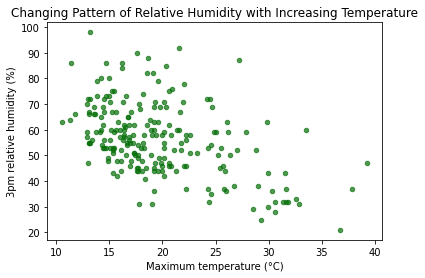

In [55]:
MergeData.plot.scatter (x = 'Maximum temperature (°C)',
                        y = '3pm relative humidity (%)', title = "Changing Pattern of Relative Humidity with Increasing Temperature",c = '#07700a', alpha = 0.7)

In [56]:
Linear=['3pm relative humidity (%)','Maximum temperature (°C)']
MergeData[Linear].corr(method='pearson')


,3pm relative humidity (%),Maximum temperature (°C)
3pm relative humidity (%),1.000000,-0.475883
Maximum temperature (°C),-0.475883,1.000000


In [57]:
# get the max

myMax = max(max(MergeData['Maximum temperature (°C)']), max(MergeData['3pm relative humidity (%)']))
myMax

98

In [58]:
# get the min

myMin = min(min(MergeData['Maximum temperature (°C)']), max(MergeData['3pm relative humidity (%)']))
myMin

10.6

In [59]:
summer_start_date = '2020-12-01'
summer_end_date = '2021-02-28'
# Select DataFrame rows between two dates
mask = (MergeData['Date'] >= summer_start_date) & (MergeData['Date'] <= summer_end_date)
df_summer = MergeData.loc[mask]

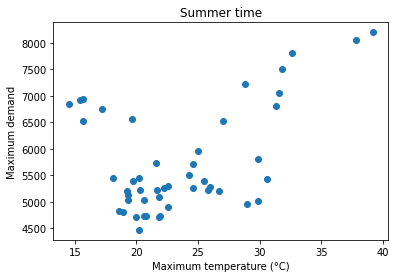

Pearson r is 0.4512538011046842 in summer time


In [60]:
plt.scatter(df_summer['Maximum temperature (°C)'], df_summer['MAXDEMAND'])
plt.xlabel("Maximum temperature (°C)")
plt.ylabel("Maximum demand")
plt.title("Summer time")
plt.show()
print("Pearson r is",df_summer['Maximum temperature (°C)'].corr(df_summer['MAXDEMAND']),"in summer time")

In [61]:
winter_start_date = '2021-06-01'
winter_end_date = '2021-08-31'
# Select DataFrame rows between two dates
mask = (MergeData['Date'] >= winter_start_date) & (MergeData['Date'] <= winter_end_date)
df_winter = MergeData.loc[mask]
display(df_winter)



,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),MAXDEMAND,Average_temp_/day(°C)
5,2021-06-01,13.7,19.2,1.2,1.0,3.2,S,35,14:56,15.2,...,11,1020.0,18.1,63,7,SW,17,1020.0,4691.13,16.45
6,2021-07-01,14.7,25.7,0.0,3.6,12.1,SE,44,13:21,18.6,...,13,1023.9,24.3,46,4,SE,20,1022.0,4994.78,20.20
7,2021-08-01,12.7,24.3,0.0,9.8,13.1,SW,31,15:04,18.6,...,6,1024.8,23.1,53,1,SW,11,1022.2,5365.19,18.50
34,2021-06-02,16.9,25.4,1.6,9.0,9.5,NW,39,11:44,18.6,...,17,998.5,23.7,45,7,NW,11,999.5,4636.36,21.15
35,2021-07-02,14.7,19.2,1.8,5.6,2.0,SW,37,11:23,15.5,...,7,1011.5,17.4,69,7,S,17,1013.7,4573.98,16.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-08-24,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,17,1021.5,11.7,55,6,S,17,1021.6,6717.65,9.75
214,2021-08-25,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,15,1023.3,13.4,59,6,SW,17,1021.8,6736.80,11.05
215,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,7,1018.6,17.4,31,3,NW,24,1013.5,5716.32,11.55
216,2021-08-29,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,13,1011.4,12.8,84,7,S,6,1010.4,6227.89,12.65


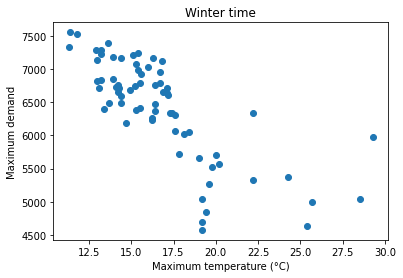

Pearson r is -0.7627935966878698 in winter time.


In [62]:
plt.scatter(df_winter['Maximum temperature (°C)'], df_winter['MAXDEMAND'])
plt.xlabel("Maximum temperature (°C)")
plt.ylabel("Maximum demand")
plt.title("Winter time")
plt.show()
print("Pearson r is",df_winter['Maximum temperature (°C)'].corr(df_winter['MAXDEMAND']),"in winter time.")

In [63]:
autumn_start_date = '2021-3-01'
autumn_end_date = '2021-5-31'
# Select DataFrame rows between two dates
mask = (MergeData['Date'] >= autumn_start_date) & (MergeData['Date'] <= autumn_end_date)
df_autumn = MergeData.loc[mask]
display(df_autumn)

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),MAXDEMAND,Average_temp_/day(°C)
2,2021-03-01,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,4,1007.7,23.5,59,4,SW,2,1005.2,4503.31,21.60
3,2021-04-01,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,11,1010.0,18.2,82,8,SW,17,1011.0,4764.18,17.30
4,2021-05-01,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,13,1012.5,18.2,82,8,SE,19,1013.3,4800.64,17.50
31,2021-03-02,13.7,25.9,0.0,5.4,13.1,SE,33,16:58,16.5,...,11,1016.5,24.1,44,2,SE,7,1011.1,5344.15,19.80
32,2021-04-02,13.5,30.6,0.0,6.6,4.1,NW,43,12:58,17.3,...,7,1005.5,29.2,32,7,N,28,1002.7,6015.71,22.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2021-04-07,6.5,13.1,0.2,1.2,3.5,NW,46,14:32,7.7,...,20,1016.4,12.2,67,7,NW,17,1015.3,6849.08,9.80
166,2021-05-07,4.6,13.1,0.4,1.6,1.9,SW,22,12:47,6.8,...,9,1022.7,12.7,66,7,SW,7,1021.5,7629.77,8.85
192,2021-03-08,8.7,14.5,4.8,2.6,4.1,NW,35,12:23,10.6,...,9,1008.1,13.3,53,6,NW,15,1007.7,7197.61,11.60
193,2021-04-08,7.8,14.5,0.6,1.8,3.4,SW,31,12:09,10.2,...,11,1016.0,14.3,67,7,W,9,1015.5,6831.32,11.15


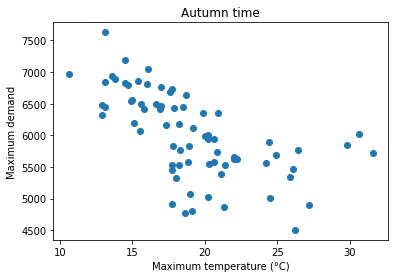

Pearson r is -0.610718756912561 in winter time.


,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),MAXDEMAND,Average_temp_/day(°C)
2,2021-03-01,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,4,1007.7,23.5,59,4,SW,2,1005.2,4503.31,21.60
3,2021-04-01,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,11,1010.0,18.2,82,8,SW,17,1011.0,4764.18,17.30
4,2021-05-01,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,13,1012.5,18.2,82,8,SE,19,1013.3,4800.64,17.50
31,2021-03-02,13.7,25.9,0.0,5.4,13.1,SE,33,16:58,16.5,...,11,1016.5,24.1,44,2,SE,7,1011.1,5344.15,19.80
32,2021-04-02,13.5,30.6,0.0,6.6,4.1,NW,43,12:58,17.3,...,7,1005.5,29.2,32,7,N,28,1002.7,6015.71,22.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2021-04-07,6.5,13.1,0.2,1.2,3.5,NW,46,14:32,7.7,...,20,1016.4,12.2,67,7,NW,17,1015.3,6849.08,9.80
166,2021-05-07,4.6,13.1,0.4,1.6,1.9,SW,22,12:47,6.8,...,9,1022.7,12.7,66,7,SW,7,1021.5,7629.77,8.85
192,2021-03-08,8.7,14.5,4.8,2.6,4.1,NW,35,12:23,10.6,...,9,1008.1,13.3,53,6,NW,15,1007.7,7197.61,11.60
193,2021-04-08,7.8,14.5,0.6,1.8,3.4,SW,31,12:09,10.2,...,11,1016.0,14.3,67,7,W,9,1015.5,6831.32,11.15


In [64]:
plt.scatter(df_autumn['Maximum temperature (°C)'], df_autumn['MAXDEMAND'])
plt.xlabel("Maximum temperature (°C)")
plt.ylabel("Maximum demand")
plt.title("Autumn time")
plt.show()
print("Pearson r is",df_autumn['Maximum temperature (°C)'].corr(df_autumn['MAXDEMAND']),"in winter time.")
df_autumn

## QUESTION1

## Linear Regression
A model which predicts the maximum daily energy usage based on the provided weather data.

In [65]:
##  Evaluation
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = MergeData[['Maximum temperature (°C)']]
y = MergeData['MAXDEMAND']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


# initialise the model
lm = linear_model.LinearRegression()


#model = lm.fit(X_train, y_train)

model = lm.fit(X_train , y_train)

y_test_predictions = lm.predict(X_test)

print('actual MAXDEMAND values of the first 5 test data:')
print(y_test[0:5])
print('')
print('predicted MAXDEMAND values of the first 5 test data:')
print(y_test_predictions[0:5])
print('')

# coefficients

print('Coefficients: ', end = ' ')
print(lm.coef_)
print('')

# intercept:
print('Intercept: ', end = ' ')
print(lm.intercept_)
print('')

# R^2
r2_test = lm.score(X_test, y_test)
r2_train = lm.score(X_train, y_train)

print('Coefficient of determination (test): {0:.2f}'.format(r2_test))
print('Coefficient of determination (training): {0:.2f}'.format(r2_train))


actual MAXDEMAND values of the first 5 test data:
100    5937.22
215    5716.32
139    6484.85
178    7556.79
15     4473.05
Name: MAXDEMAND, dtype: float64

predicted MAXDEMAND values of the first 5 test data:
[6130.75451543 6202.19424704 6327.21377737 6365.48506216 6140.96019137]

Coefficients:  [-25.51418986]

Intercept:  6656.346826591327

Coefficient of determination (test): 0.10
Coefficient of determination (training): 0.03


In [68]:
"""
Coefficient of determination (test): 0.10
Coefficient of determination (training): 0.03 

Coefficient is very low. the Maximum temperature and MAXDEMAND plot's is U shape and linear
regression is not right choice to find a model between them,so we should choose another variable.

we can consider absolute diffrence's between average temperature and 20 (°C) instead of Maximum temperature.

20 (°C) is ideal temperature and the demand is minimum in 20 (°C).

"""

"\nCoefficient of determination (test): 0.10\nCoefficient of determination (training): 0.03 \n\nCoefficient is very low. the Maximum temperature and MAXDEMAND plot's is U shape and linear\nregression is not right choice to find a model between them,so we should choose another variable.\n\nwe can consider absolute diffrence's between average temperature and 20 (°C) instead of Maximum temperature.\n\n20 (°C) is ideal temperature and the demand is minimum in 20 (°C).\n\n"

In [52]:
# Diff daily temperature

temp = MergeData.loc[:, "avg_temp"]
MergeData['Diff_temp_/day(°C)'] = abs(20-temp)
display(MergeData.head())


,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),MAXDEMAND,avg_temp,Diff_temp_/day(°C)
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,1018.8,28.1,43,5,E,13,1015.3,5019.64,22.75,2.75
1,2021-02-01,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,1013.3,28.7,38,7,SW,4,1008.5,4964.35,23.70,3.70
2,2021-03-01,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,1007.7,23.5,59,4,SW,2,1005.2,4503.31,21.60,1.60
3,2021-04-01,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,1010.0,18.2,82,8,SW,17,1011.0,4764.18,17.30,2.70
4,2021-05-01,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,1012.5,18.2,82,8,SE,19,1013.3,4800.64,17.50,2.50


<AxesSubplot:xlabel='Diff_temp_/day(°C)', ylabel='MAXDEMAND'>

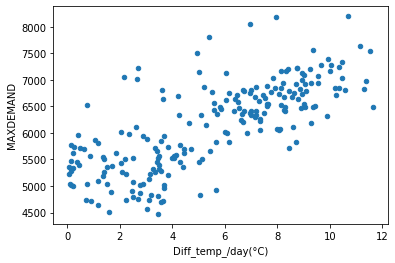

In [70]:

MergeData.plot.scatter (x = 'Diff_temp_/day(°C)',
                        y = 'MAXDEMAND')


In [ ]:
#The plot between MAXDEMAND and Diff_temp_/day(°C) is almost linear.

Text(0.5, 1.0, 'Corrilation Map to explain the strength of relationship')

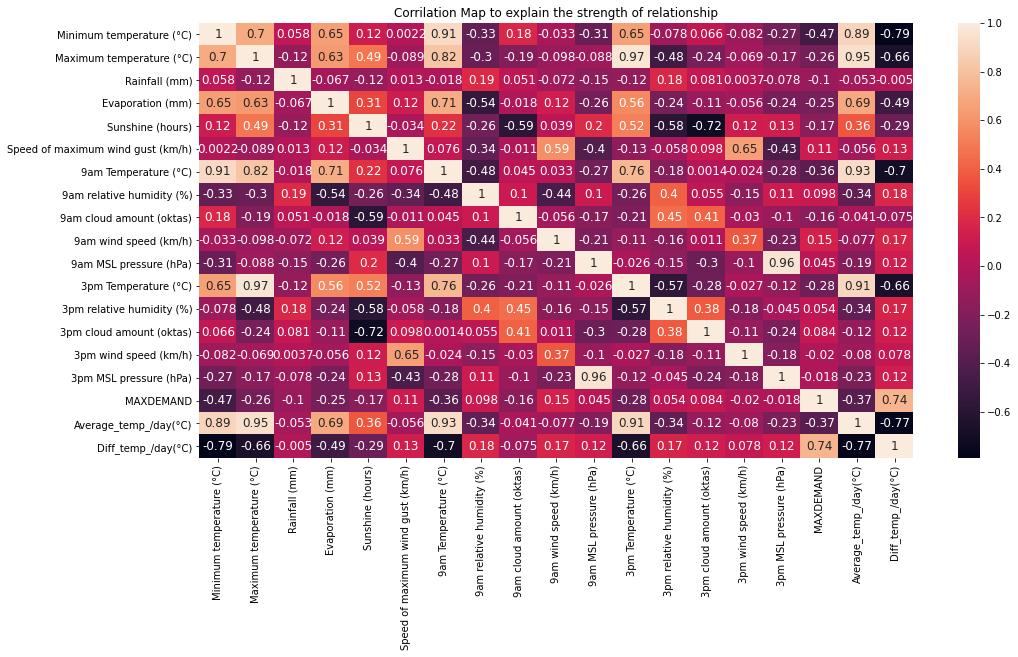

In [71]:
# Corrilarion values- Strong positive corrilations has light colour, negative corrilations has dark colour.
plt.figure(figsize=(16,8))
sns.heatmap(MergeData.corr(), annot = True, annot_kws={"size":12})

plt.title("Corrilation Map to explain the strength of relationship")
#sns.heatmap(MergeData, annot=True, fmt=".lf", linewidth=5, square=True, cmap='Blues_r')


In [ ]:
# Correlation between MAXDEMAND and Diff_temp_/day(°C) is 74%.
# that shows strong relationship.

In [54]:
##  Evaluation
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = MergeData[['Diff_temp_/day(°C)']]
y = MergeData['MAXDEMAND']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


# initialise the model
lm = linear_model.LinearRegression()


#model = lm.fit(X_train, y_train)

model = lm.fit(X_train , y_train)

y_test_predictions = lm.predict(X_test)

#Evaluation
#print(mean_squared_error(y_test,y_pred))
#print(r2_score((y_test,y_pred))
print('actual MAXDEMAND values of the first 5 test data:')
print(y_test[0:5])
print('')
print('predicted MAXDEMAND values of the first 5 test data:')
print(y_test_predictions[0:5])
print('')

# coefficients

print('Coefficients: ', end = ' ')
print(lm.coef_)
print('')

# intercept:
print('Intercept: ', end = ' ')
print(lm.intercept_)
print('')

# R^2
r2_test = lm.score(X_test, y_test)
r2_train = lm.score(X_train, y_train)

print('Coefficient of determination (test): {0:.2f}'.format(r2_test))
print('Coefficient of determination (training): {0:.2f}'.format(r2_train))



actual MAXDEMAND values of the first 5 test data:
100    5937.22
215    5716.32
139    6484.85
178    7556.79
15     4473.05
Name: MAXDEMAND, dtype: float64

predicted MAXDEMAND values of the first 5 test data:
[5762.12163508 6747.81641906 7411.86343142 6934.57964129 5710.24296224]

Coefficients:  [207.51469136]

Intercept:  4994.317277031962

Coefficient of determination (test): 0.47
Coefficient of determination (training): 0.60


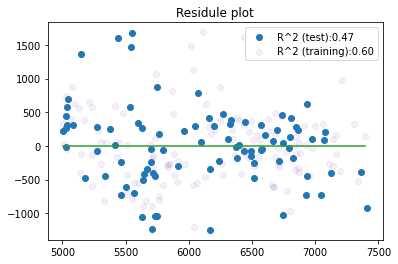

In [55]:
## Plot the residuals for the test data as well as the training data of the model.

##Include legends in the scatter plot; include the Coefficient of Determination for each legend.

import matplotlib.pyplot as plt
# Plot residules


y_test_h = lm.predict(X_test)
y_train_h = lm.predict(X_train)

residual_train = [y - yh for y, yh in zip(y_train, y_train_h)]
residual_test = [y - yh for y, yh in zip(y_test, y_test_h)]

plt.scatter(y_test_h, residual_test, color='C0', label = 'R^2 (test):{0:.2f}'.format(r2_test))
plt.scatter(y_train_h, residual_train, color='C4', alpha = 0.1, label = 'R^2 (training):{0:.2f}'.format(r2_train))
plt.plot([min(y_train_h), max(y_train_h)], [0,0], color= 'C2')
plt.legend()
plt.title("Residule plot")
plt.show()


In [184]:
#Fit another linear model using all variables to predict MAXDEMAND.

#Compare the results with the previous model.


X = MergeData[['Diff_temp_/day(°C)']]
y = MergeData['MAXDEMAND']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,train_size = 0.90, random_state=42)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

# coefficients

print('Coefficients: ', end = ' ')
print(lm.coef_)
print('')

# intercept:
print('Intercept: ', end = ' ')
print(lm.intercept_)
print('')

# R^2
r2_test = lm.score(X_test, y_test)
r2_train = lm.score(X_train, y_train)

print('Coefficient of determination (test): {0:.2f}'.format(r2_test))
print('Coefficient of determination (training): {0:.2f}'.format(r2_train))



Coefficients:  [192.5643243]

Intercept:  5082.598459856963

Coefficient of determination (test): 0.56
Coefficient of determination (training): 0.55


In [ ]:
# Comparing two models: 
# Both models are almost same variance in MAXDEMAND.   From 47% to 48% Variance.


In [179]:
k=5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

acc_score = []
acc_score_dt = []

for train_index, test_index in kf.split(data):
    #Perform the split for this fold
    X_train, X_test = data.iloc[train_index, :], data.iloc[test_index, :]
    y_train, y_test = classlabel[train_index], classlabel[test_index]
    
    
    # STEP 0
    scaler = preprocessing.StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)

    imputer = SimpleImputer()
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)
    
    feature_selector = SelectKBest(mutual_info_classif, k=6)
    X_train = feature_selector.fit_transform(X_train, y_train)
    X_test = feature_selector.transform(X_test)

    pca = PCA(n_components=6)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

# STEP 1
    knn = neighbors.KNeighborsClassifier(n_neighbors=10)
    dt = DecisionTreeClassifier(criterion="entropy", max_depth=6)

    # STEP 2: Fitting data / Training
    knn.fit(X_train, y_train)
    dt.fit(X_train, y_train)

    # STEP 3: Prediction / Test
    y_pred=knn.predict(X_test)
    y_pred_dt = dt.predict(X_test)
    
    # STEP 4: Eval
    acc_score.append(accuracy_score(y_test, y_pred))
    acc_score_dt.append(accuracy_score(y_test, y_pred_dt))

In [173]:
X_train.shape

(175, 6)

In [136]:
X_test.shape

(43, 3)

In [226]:
pca.explained_variance_ratio_.sum()

1.0

In [138]:
 X_train.shape

(175, 3)

In [175]:
sum(acc_score)/k

0.4954545454545454

In [176]:
acc_score

[0.4772727272727273,
 0.4772727272727273,
 0.5227272727272727,
 0.6046511627906976,
 0.3953488372093023]

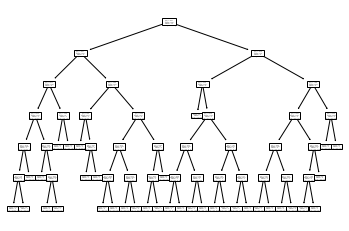

In [180]:
tree.plot_tree(dt)
plt.show()

In [178]:
#step 4 : Evaluation, (accuracy, precision recall)
print(accuracy_score(y_test, y_pred))

0.3953488372093023


In [182]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 5)

In [183]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

# QUESTION2

In [ ]:
#................................Question 2 explained...............................................................................................

In [57]:
Data_p

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,Time
0,VIC1,1/01/2021 0:30,4179.21,LOW,2021-01-01,00:30:00
1,VIC1,1/01/2021 1:00,4047.76,LOW,2021-01-01,01:00:00
2,VIC1,1/01/2021 1:30,3934.70,LOW,2021-01-01,01:30:00
3,VIC1,1/01/2021 2:00,3766.45,LOW,2021-01-01,02:00:00
4,VIC1,1/01/2021 2:30,3590.37,LOW,2021-01-01,02:30:00
...,...,...,...,...,...,...
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,2021-08-31,22:00:00
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,2021-08-31,22:30:00
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,2021-08-31,23:00:00
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM,2021-08-31,23:30:00


In [58]:
MergeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 217
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               218 non-null    datetime64[ns]
 1   Minimum temperature (°C)           218 non-null    float64       
 2   Maximum temperature (°C)           218 non-null    float64       
 3   Rainfall (mm)                      218 non-null    float64       
 4   Evaporation (mm)                   218 non-null    float64       
 5   Sunshine (hours)                   218 non-null    float64       
 6   Direction of maximum wind gust     218 non-null    object        
 7   Speed of maximum wind gust (km/h)  218 non-null    int64         
 8   Time of maximum wind gust          218 non-null    object        
 9   9am Temperature (°C)               218 non-null    float64       
 10  9am relative humidity (%)          218

In [59]:
from sklearn.metrics.cluster import normalized_mutual_info_score
MergeData['max_temp_binned']=pd.cut(MergeData['Maximum temperature (°C)'], bins=4)
MergeData['demand_binned']=pd.cut(MergeData['MAXDEMAND'], bins=4)
display(MergeData)
nmi=normalized_mutual_info_score(MergeData['demand_binned'],MergeData['max_temp_binned'], average_method='min')
print("NMI : "+ str(nmi))

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),MAXDEMAND,avg_temp,Diff_temp_/day(°C),max_temp_binned,demand_binned
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,43,5,E,13,1015.3,5019.64,22.75,2.75,"(24.9, 32.05]","(4469.326, 5403.995]"
1,2021-02-01,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,38,7,SW,4,1008.5,4964.35,23.70,3.70,"(24.9, 32.05]","(4469.326, 5403.995]"
2,2021-03-01,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,59,4,SW,2,1005.2,4503.31,21.60,1.60,"(24.9, 32.05]","(4469.326, 5403.995]"
3,2021-04-01,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,82,8,SW,17,1011.0,4764.18,17.30,2.70,"(17.75, 24.9]","(4469.326, 5403.995]"
4,2021-05-01,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,82,8,SE,19,1013.3,4800.64,17.50,2.50,"(17.75, 24.9]","(4469.326, 5403.995]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-08-24,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,55,6,S,17,1021.6,6717.65,9.75,10.25,"(10.571, 17.75]","(6334.94, 7265.885]"
214,2021-08-25,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,59,6,SW,17,1021.8,6736.80,11.05,8.95,"(10.571, 17.75]","(6334.94, 7265.885]"
215,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,31,3,NW,24,1013.5,5716.32,11.55,8.45,"(17.75, 24.9]","(5403.995, 6334.94]"
216,2021-08-29,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,84,7,S,6,1010.4,6227.89,12.65,7.35,"(10.571, 17.75]","(5403.995, 6334.94]"


NMI : 0.32508594193182894


In [60]:
def bin_rating(x):
    """
   Equal length descritisation.
    
        [min, 4080.605), [4080.605, 5452.68), [5452.68, 6824.755 ) [6824.755, max]
        
        min = 2708.53
        max = 8196.83

    
    """
    LOWER = 4080.605

    MID = 5452.68
    
    UPPER = 6824.755

    
    # [min, 4080.605)
    if x < LOWER:        
        return 1
    
    #  [4080.605, 5452.68)
    elif LOWER <= x < MID:
        return 2 
    
    #  [5452.68, 6824.755 ) 
   
    elif MID <= x < UPPER:
        return 3

   #[6824.755, max]
    return 4

# apply the function on the series
MergeData['bin_rating'] = MergeData['MAXDEMAND'].apply(bin_rating)

# also, print out the min/max for this feature
MergeData

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),MAXDEMAND,avg_temp,Diff_temp_/day(°C),max_temp_binned,demand_binned,bin_rating
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,5,E,13,1015.3,5019.64,22.75,2.75,"(24.9, 32.05]","(4469.326, 5403.995]",2
1,2021-02-01,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,7,SW,4,1008.5,4964.35,23.70,3.70,"(24.9, 32.05]","(4469.326, 5403.995]",2
2,2021-03-01,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,4,SW,2,1005.2,4503.31,21.60,1.60,"(24.9, 32.05]","(4469.326, 5403.995]",2
3,2021-04-01,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,8,SW,17,1011.0,4764.18,17.30,2.70,"(17.75, 24.9]","(4469.326, 5403.995]",2
4,2021-05-01,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,8,SE,19,1013.3,4800.64,17.50,2.50,"(17.75, 24.9]","(4469.326, 5403.995]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-08-24,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,6,S,17,1021.6,6717.65,9.75,10.25,"(10.571, 17.75]","(6334.94, 7265.885]",3
214,2021-08-25,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,6,SW,17,1021.8,6736.80,11.05,8.95,"(10.571, 17.75]","(6334.94, 7265.885]",3
215,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,3,NW,24,1013.5,5716.32,11.55,8.45,"(17.75, 24.9]","(5403.995, 6334.94]",3
216,2021-08-29,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,7,S,6,1010.4,6227.89,12.65,7.35,"(10.571, 17.75]","(5403.995, 6334.94]",3


In [61]:
Data_p['PRICECATEGORY'].value_counts()


LOW        7570
MEDIUM     3061
HIGH        777
EXTREME     256
Name: PRICECATEGORY, dtype: int64

In [62]:
display(Data_p.head())

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,Time
0,VIC1,1/01/2021 0:30,4179.21,LOW,2021-01-01,00:30:00
1,VIC1,1/01/2021 1:00,4047.76,LOW,2021-01-01,01:00:00
2,VIC1,1/01/2021 1:30,3934.70,LOW,2021-01-01,01:30:00
3,VIC1,1/01/2021 2:00,3766.45,LOW,2021-01-01,02:00:00
4,VIC1,1/01/2021 2:30,3590.37,LOW,2021-01-01,02:30:00


In [63]:
# In this function we want to find the maximum daily price category.
def bin_grade(x):

 
    if x == 'LOW':        
        return 1
    
    elif x == 'MEDIUM':
        return 2 
    
    elif x == 'HIGH':
        return 3

      
    elif x == 'EXTREME':
        return 4

# apply the function on the series
Data_p['bin_grade'] = Data_p['PRICECATEGORY'].apply(bin_grade)

Data_p

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,Time,bin_grade
0,VIC1,1/01/2021 0:30,4179.21,LOW,2021-01-01,00:30:00,1
1,VIC1,1/01/2021 1:00,4047.76,LOW,2021-01-01,01:00:00,1
2,VIC1,1/01/2021 1:30,3934.70,LOW,2021-01-01,01:30:00,1
3,VIC1,1/01/2021 2:00,3766.45,LOW,2021-01-01,02:00:00,1
4,VIC1,1/01/2021 2:30,3590.37,LOW,2021-01-01,02:30:00,1
...,...,...,...,...,...,...,...
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,2021-08-31,22:00:00,2
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,2021-08-31,22:30:00,2
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,2021-08-31,23:00:00,2
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM,2021-08-31,23:30:00,2


In [64]:
#Now make them as groups and find the the maximum daily price category
Data_p2 = Data_p.groupby("Date").max("bin_grade")
Data_p2

,TOTALDEMAND,bin_grade
Date,,
2021-01-01,5019.64,1
2021-01-02,5228.29,2
2021-01-03,5225.37,1
2021-01-04,5807.02,2
2021-01-05,5261.09,2
...,...,...
2021-12-04,6415.58,3
2021-12-05,6406.00,4
2021-12-06,6062.58,4


In [65]:
# Turning 1,2,3,4 to LOW, MEIUM, HIGH, EXTEREM

def maximum_daily_price(x):

 
    if x == 1 :        
        return 'LOW'
    
    elif x == 2:
        return 'MEDIUM' 
    
    elif x == 3:
        return 'HIGH'

      
    elif x == 4:
        return 'EXTREME'

# apply the function on the series
Data_p2['maximum_daily_price_category'] = Data_p2['bin_grade'].apply(maximum_daily_price)

Data_p2

,TOTALDEMAND,bin_grade,maximum_daily_price_category
Date,,,
2021-01-01,5019.64,1,LOW
2021-01-02,5228.29,2,MEDIUM
2021-01-03,5225.37,1,LOW
2021-01-04,5807.02,2,MEDIUM
2021-01-05,5261.09,2,MEDIUM
...,...,...,...
2021-12-04,6415.58,3,HIGH
2021-12-05,6406.00,4,EXTREME
2021-12-06,6062.58,4,EXTREME


In [66]:
#The merged dataframe is assigned as MergeData
MergeData2 = MergeData.merge(Data_p2, how = 'inner', on = 'Date') 
MergeData2

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,3pm MSL pressure (hPa),MAXDEMAND,avg_temp,Diff_temp_/day(°C),max_temp_binned,demand_binned,bin_rating,TOTALDEMAND,bin_grade,maximum_daily_price_category
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,1015.3,5019.64,22.75,2.75,"(24.9, 32.05]","(4469.326, 5403.995]",2,5019.64,1,LOW
1,2021-02-01,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,1008.5,4964.35,23.70,3.70,"(24.9, 32.05]","(4469.326, 5403.995]",2,4964.35,1,LOW
2,2021-03-01,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,1005.2,4503.31,21.60,1.60,"(24.9, 32.05]","(4469.326, 5403.995]",2,4503.31,1,LOW
3,2021-04-01,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,1011.0,4764.18,17.30,2.70,"(17.75, 24.9]","(4469.326, 5403.995]",2,4764.18,1,LOW
4,2021-05-01,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,1013.3,4800.64,17.50,2.50,"(17.75, 24.9]","(4469.326, 5403.995]",2,4800.64,1,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-08-24,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,1021.6,6717.65,9.75,10.25,"(10.571, 17.75]","(6334.94, 7265.885]",3,6717.65,3,HIGH
214,2021-08-25,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,1021.8,6736.80,11.05,8.95,"(10.571, 17.75]","(6334.94, 7265.885]",3,6736.80,4,EXTREME
215,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,1013.5,5716.32,11.55,8.45,"(17.75, 24.9]","(5403.995, 6334.94]",3,5716.32,2,MEDIUM
216,2021-08-29,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,1010.4,6227.89,12.65,7.35,"(10.571, 17.75]","(5403.995, 6334.94]",3,6227.89,4,EXTREME


In [67]:
MergeData2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 217
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               218 non-null    datetime64[ns]
 1   Minimum temperature (°C)           218 non-null    float64       
 2   Maximum temperature (°C)           218 non-null    float64       
 3   Rainfall (mm)                      218 non-null    float64       
 4   Evaporation (mm)                   218 non-null    float64       
 5   Sunshine (hours)                   218 non-null    float64       
 6   Direction of maximum wind gust     218 non-null    object        
 7   Speed of maximum wind gust (km/h)  218 non-null    int64         
 8   Time of maximum wind gust          218 non-null    object        
 9   9am Temperature (°C)               218 non-null    float64       
 10  9am relative humidity (%)          218

In [213]:
##get just the features

data=MergeData2[['Minimum temperature (°C)','Maximum temperature (°C)','Sunshine (hours)','Evaporation (mm)'
                  ,'Speed of maximum wind gust (km/h)','9am Temperature (°C)']].astype(float)
##get just the class labels
classlabel=MergeData2['maximum_daily_price_category']

##randomly select 66% of the instances to be training and the rest to be testing
X_train, X_test, y_train, y_test = train_test_split(data,classlabel, train_size=0.87, test_size=0.13, random_state=42)

#normalise the data to have 0 mean and unit variance using the library functions.  This will help for later
#computation of distances between instances
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [210]:
knn = neighbors.KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [215]:
# We compare our prediction with the actual class label and report the overall accuracy.
y_pred=knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6206896551724138


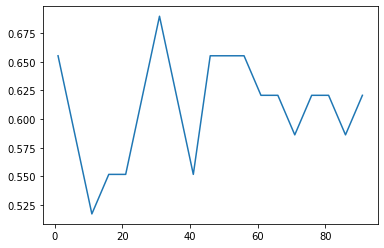

In [216]:
# Draw a graph of decision tree classification accuracy when the size of the training set is varied 
import numpy
ks = range(1,95,5)
accu_list=[]
for k in ks:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train) 
    y_pred=knn.predict(X_test)
    accu_list.append(accuracy_score(y_test, y_pred))
    

plt.plot(ks,accu_list)
plt.show()


<AxesSubplot:title={'center':'The Total Demand with time'}, xlabel='PRICECATEGORY', ylabel='TOTALDEMAND'>

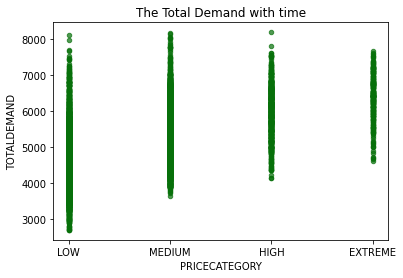

In [217]:
# Make them into clusters
Data_p.plot.scatter (x = 'PRICECATEGORY',
                    y = 'TOTALDEMAND', title = "The Total Demand with time",c = '#07700a', alpha = 0.7) 

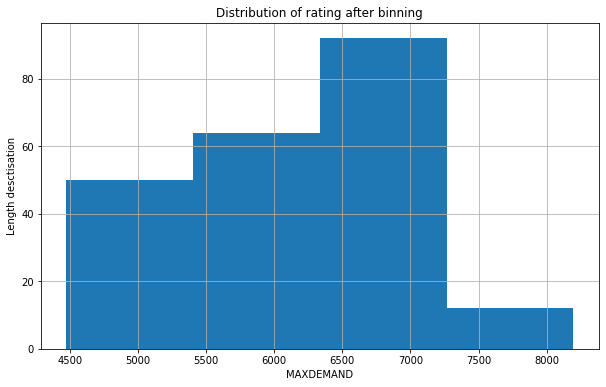

In [218]:
# Length Descretization
MergeData.MAXDEMAND.hist(bins = 4, figsize = (10,6))
plt.xlabel("MAXDEMAND")
plt.ylabel("Length desctisation")
plt.title('Distribution of rating after binning')


plt.show()

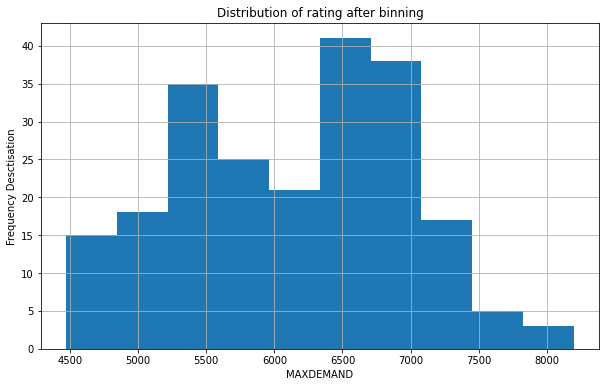

In [76]:
# Frequency Descretization
             
MergeData.MAXDEMAND.hist(bins = 10, figsize = (10,6))
plt.xlabel("MAXDEMAND")
plt.ylabel("Frequency Desctisation")
plt.title('Distribution of rating after binning')


plt.show()

In [77]:
Data_pc = pd.get_dummies(Data_p, columns = ['PRICECATEGORY'])
Data_pc

,REGION,SETTLEMENTDATE,TOTALDEMAND,Date,Time,bin_grade,PRICECATEGORY_EXTREME,PRICECATEGORY_HIGH,PRICECATEGORY_LOW,PRICECATEGORY_MEDIUM
0,VIC1,1/01/2021 0:30,4179.21,2021-01-01,00:30:00,1,0,0,1,0
1,VIC1,1/01/2021 1:00,4047.76,2021-01-01,01:00:00,1,0,0,1,0
2,VIC1,1/01/2021 1:30,3934.70,2021-01-01,01:30:00,1,0,0,1,0
3,VIC1,1/01/2021 2:00,3766.45,2021-01-01,02:00:00,1,0,0,1,0
4,VIC1,1/01/2021 2:30,3590.37,2021-01-01,02:30:00,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
11659,VIC1,31/08/2021 22:00,4861.91,2021-08-31,22:00:00,2,0,0,0,1
11660,VIC1,31/08/2021 22:30,4748.74,2021-08-31,22:30:00,2,0,0,0,1
11661,VIC1,31/08/2021 23:00,4620.09,2021-08-31,23:00:00,2,0,0,0,1
11662,VIC1,31/08/2021 23:30,4834.00,2021-08-31,23:30:00,2,0,0,0,1


In [78]:
# Count values of PriceCategory data entries
Data_p['PRICECATEGORY'].value_counts()

LOW        7570
MEDIUM     3061
HIGH        777
EXTREME     256
Name: PRICECATEGORY, dtype: int64

In [79]:
Data_p.PRICECATEGORY.unique()

array(['LOW', 'MEDIUM', 'HIGH', 'EXTREME'], dtype=object)

(-1.1112762702946841,
 1.1005369652521277,
 -1.1087674267121206,
 1.1069554353271198)

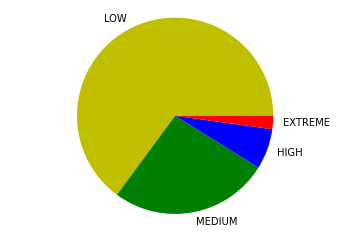

In [80]:
# explaining the price category in pie chart
P_CATEGORY=["LOW","MEDIUM","HIGH","EXTREME"]
co2=[7570, 3061,777,256]
colors=['y','g','b','r' ]
plt.pie(co2,explode=None,labels=P_CATEGORY,colors=colors)
plt.axis('equal')

In [81]:
# calculating the normalised mutual information for the two categorical variables.( small number means weak relationship) 

from sklearn.metrics import normalized_mutual_info_score
normalized_mutual_info_score(Data_p['SETTLEMENTDATE'], Data_p['PRICECATEGORY'])

0.17463937143618494

In [ ]:

feature_selector.scores_

In [ ]:

#chi square can be calculated  for catogorical(feature)- categorical(target) classification models

In [ ]:
 chi2_val, p, dof, expected = stats.chi2_contingency( MergeData.values,correction = False)
print('Chi2 Value:', chi2_val)
if (p<0.050) :
    print("NO")
else: 
    print('Null')